In [85]:
import pandas as pd

In [86]:
# load benchmark data

baseline = pd.read_csv('2024-07-08_16-29-18_baseline_benchmark_results_5.csv')
baseline

,baseline_f1
0,0.298738
1,0.270482
2,0.238539
3,0.231163
4,0.229947


In [87]:
topk = pd.read_csv('2024-06-28_14-54-51_top_k_bc_benchmark_results_30.csv')
topk = topk.head(5)
topk

,top_k_bc_f1
0,0.437283
1,0.441084
2,0.437464
3,0.438648
4,0.439673


In [88]:
fme = pd.read_csv('2024-07-09_19-50-50_fme_benchmark_results_5.csv')
fme

,fme_f1
0,0.323955
1,0.302131
2,0.281718
3,0.293938
4,0.283546


In [89]:
knn = pd.read_csv('2024-07-09_20-35-41_knn_benchmark_results_5.csv')
knn

,knn_f1
0,0.289605
1,0.292029
2,0.298582
3,0.297286
4,0.287708


In [90]:
gnn = pd.read_csv('2024-07-11_20-59-48_graph_benchmark_results_5.csv')

# rename columns
gnn = gnn.rename(columns={'fme_f1': 'graphsage_f1'})

gnn

,graphsage_f1
0,0.003453
1,0.003854
2,0.000687
3,0.002989
4,0.000913


In [91]:
# horizontal merge

merged = pd.concat([baseline, topk, fme, knn, gnn], axis=1)
merged

,baseline_f1,top_k_bc_f1,fme_f1,knn_f1,graphsage_f1
0,0.298738,0.437283,0.323955,0.289605,0.003453
1,0.270482,0.441084,0.302131,0.292029,0.003854
2,0.238539,0.437464,0.281718,0.298582,0.000687
3,0.231163,0.438648,0.293938,0.297286,0.002989
4,0.229947,0.439673,0.283546,0.287708,0.000913


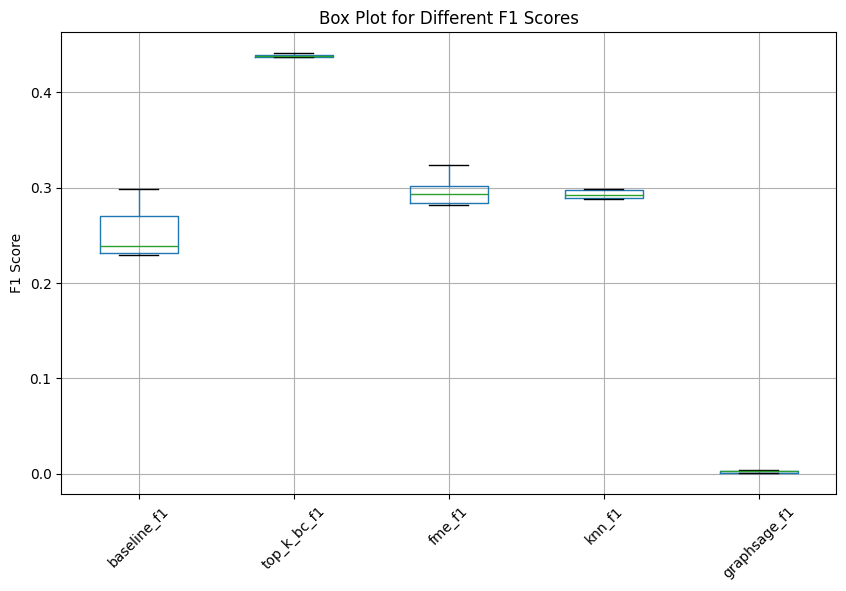

In [92]:
# plot as points

import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))
merged.boxplot()
plt.title('Box Plot for Different F1 Scores')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()



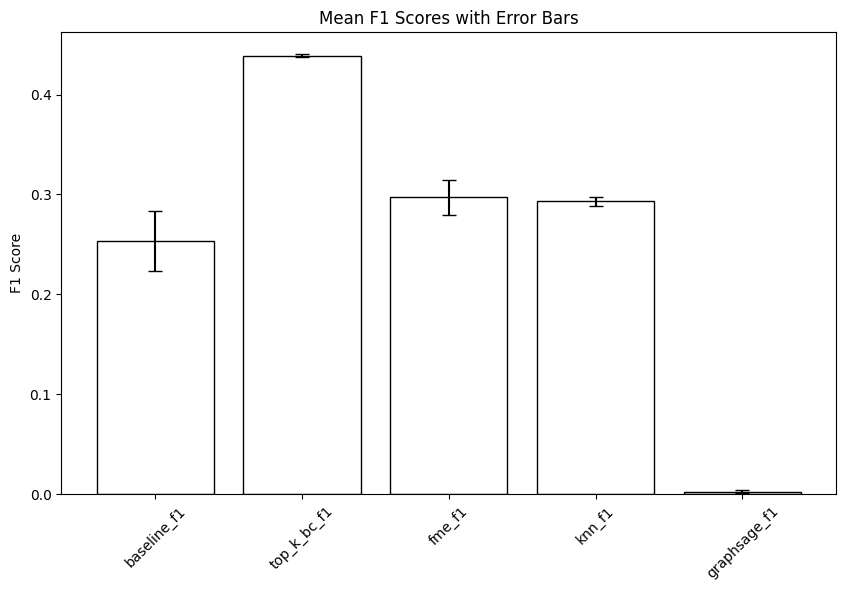

In [93]:
# Calculate mean and standard deviation
means = merged.mean()
errors = merged.std()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(means.index, means, yerr=errors, capsize=5, edgecolor='black', facecolor='none')
plt.title('Mean F1 Scores with Error Bars')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

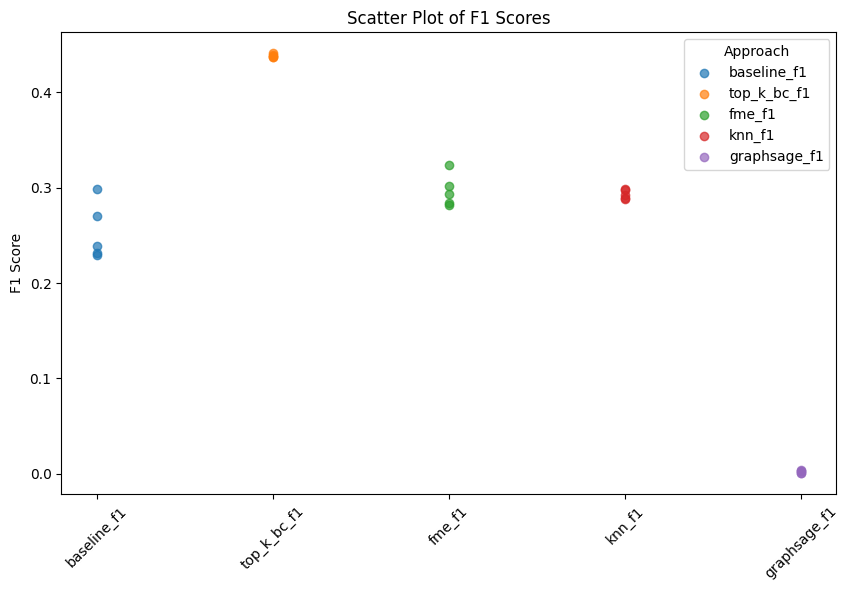

In [94]:
plt.figure(figsize=(10, 6))
for column in merged.columns:
    plt.scatter([column]*len(merged), merged[column], alpha=0.7, label=column)

plt.title('Scatter Plot of F1 Scores')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Approach')
plt.show()

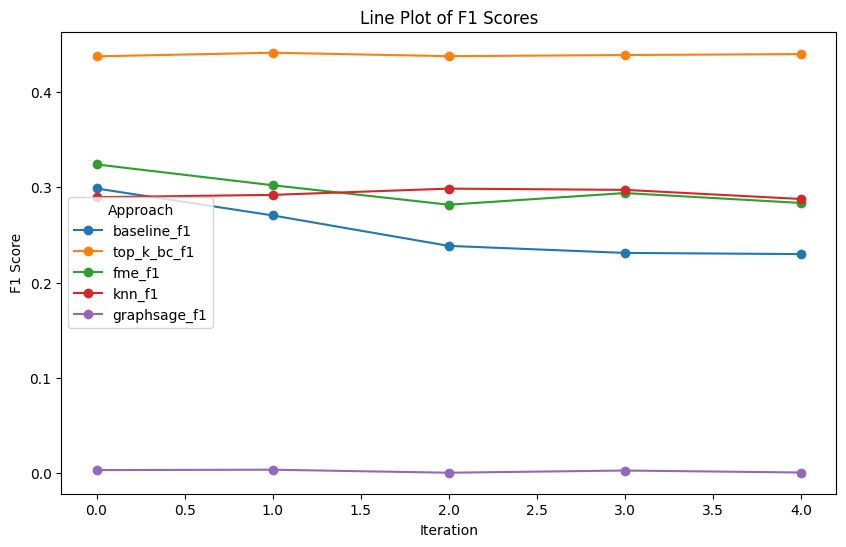

In [95]:
# Plotting the line plot
plt.figure(figsize=(10, 6))
for column in merged.columns:
    plt.plot(merged[column], marker='o', label=column)

plt.title('Line Plot of F1 Scores')
plt.ylabel('F1 Score')
plt.xlabel('Iteration')
plt.legend(title='Approach')
plt.show()

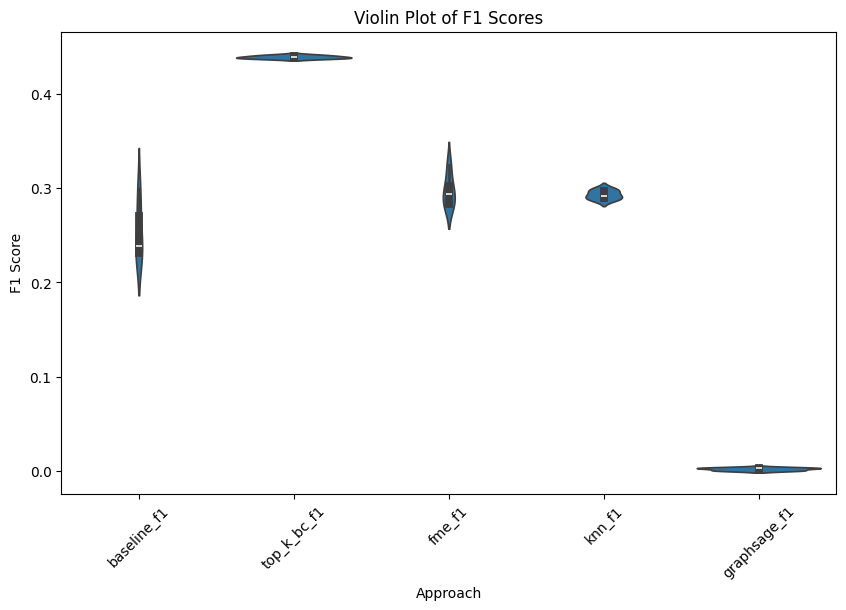

In [96]:
import seaborn as sns

# Melt the DataFrame for seaborn
df_melted = merged.melt(var_name='Approach', value_name='F1 Score')

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Approach', y='F1 Score', data=df_melted)
plt.title('Violin Plot of F1 Scores')
plt.xticks(rotation=45)
plt.show()


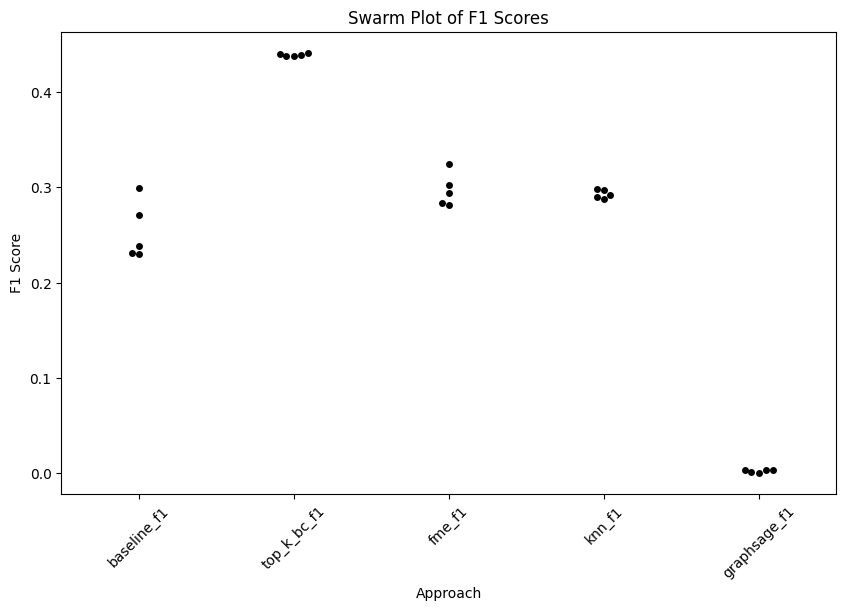

In [97]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Approach', y='F1 Score', data=df_melted, color='black')
plt.title('Swarm Plot of F1 Scores')
plt.xticks(rotation=45)
plt.show()


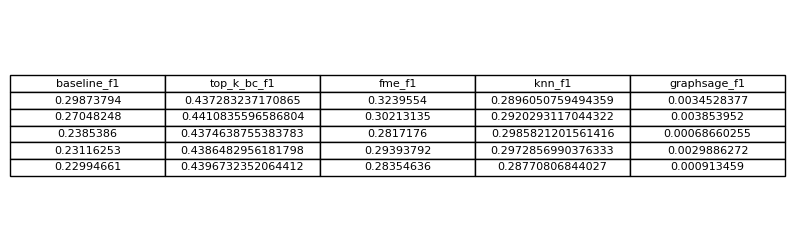

In [98]:
df = merged

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 3))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('table_image.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

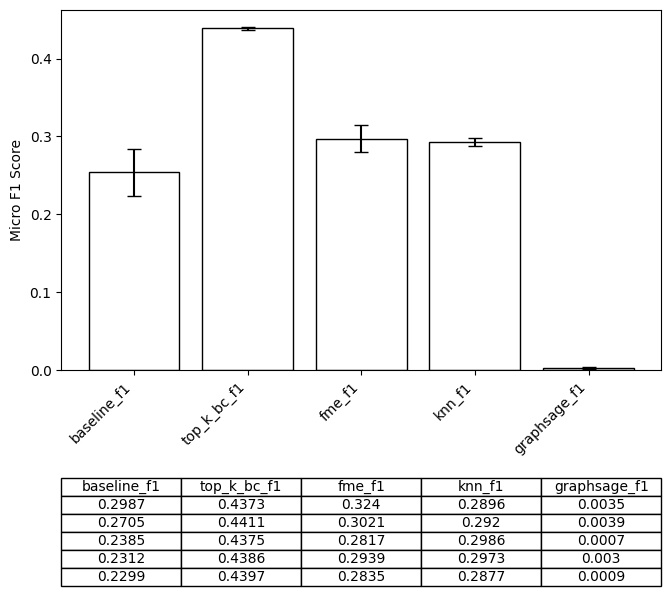

In [101]:
import pandas as pd
import matplotlib.pyplot as plt



# Limit the data to 4 decimal places
df = df.round(4)

# Calculate mean and standard deviation
means = df.mean()
errors = df.std()

# Create the figure and the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(means.index, means, yerr=errors, capsize=5, edgecolor='black', facecolor='none')
ax.set_ylabel('Micro F1 Score')
ax.set_xticks(range(len(means.index)))
ax.set_xticklabels(means.index, rotation=45, ha='right')

# Add a table below the bar plot
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
ax_table = plt.gca().table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='bottom', bbox=[0, -0.6, 1, 0.3])
ax_table.auto_set_font_size(False)
ax_table.set_fontsize(10)
ax_table.scale(1.2, 1.2)

# Save the combined image
plt.savefig('barplot_with_table.png', bbox_inches='tight', pad_inches=0.1)

plt.show()


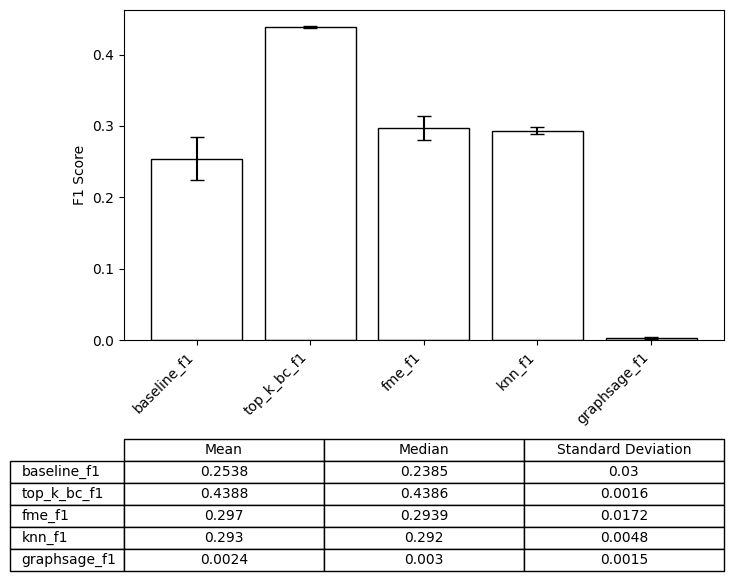

In [109]:
# Calculate mean, median, and standard deviation
summary_stats = df.agg(['mean', 'median', 'std']).round(4).T
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'std': 'Standard Deviation'})

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

means = df.mean()
errors = df.std()

bars = ax.bar(means.index, means, yerr=errors, capsize=5, edgecolor='black', facecolor='none')
ax.set_ylabel('F1 Score')
ax.set_xticks(range(len(means.index)))
ax.set_xticklabels(means.index, rotation=45, ha='right')

# Add a table below the bar plot with mean, median, and std
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.35)
ax_table = plt.gca().table(cellText=summary_stats.values,
                           colLabels=summary_stats.columns,
                           rowLabels=summary_stats.index,
                           cellLoc='center',
                           loc='bottom',
                           bbox=[0, -0.7, 1, 0.4])
ax_table.auto_set_font_size(False)
ax_table.set_fontsize(10)
ax_table.scale(1.2, 1.2)

# Save the combined image
plt.savefig('barplot_with_summary_table.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

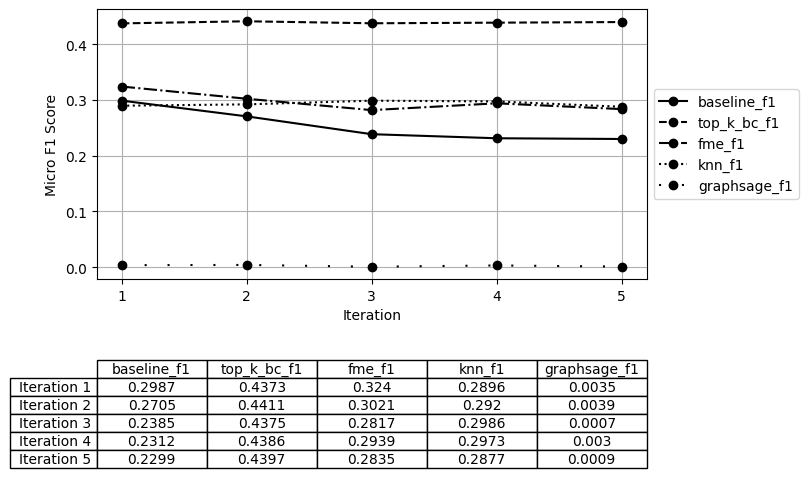

In [108]:
# Define line styles
line_styles = ['-', '--', '-.', ':', (0, (1, 10))]

# Create the figure and the line plot
fig, ax = plt.subplots(figsize=(10, 6))


for (column, style) in zip(df.columns, line_styles):
    ax.plot(df.index + 1, df[column], linestyle=style, marker='o', label=column, color='black')

ax.set_xlabel('Iteration')
ax.set_ylabel('Micro F1 Score')
ax.set_xticks(range(1, 6))  # Set x-ticks to only whole numbers from 1 to 5
ax.grid(True)

# Move the legend outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a table below the line plot
plt.subplots_adjust(left=0.2, right=0.75, top=0.8, bottom=0.35)
ax_table = plt.gca().table(cellText=df.values,
                           colLabels=df.columns,
                           rowLabels=[f"Iteration {i}" for i in df.index + 1],
                           cellLoc='center',
                           loc='bottom',
                           bbox=[0, -0.7, 1, 0.4])
ax_table.auto_set_font_size(False)
ax_table.set_fontsize(10)
ax_table.scale(1.2, 1.2)
plt.show()

In [111]:
metadata = pd.read_csv('../data/l1/GLC24_PA_metadata_train.csv')
metadata

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
...,...,...,...,...,...,...,...,...,...
1483632,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655


In [146]:
# create barplot of species counts

species_counts = metadata['speciesId'].value_counts()
species_counts = species_counts.iloc[:50]

# make index integers

species_counts.index = species_counts.index.astype(int)


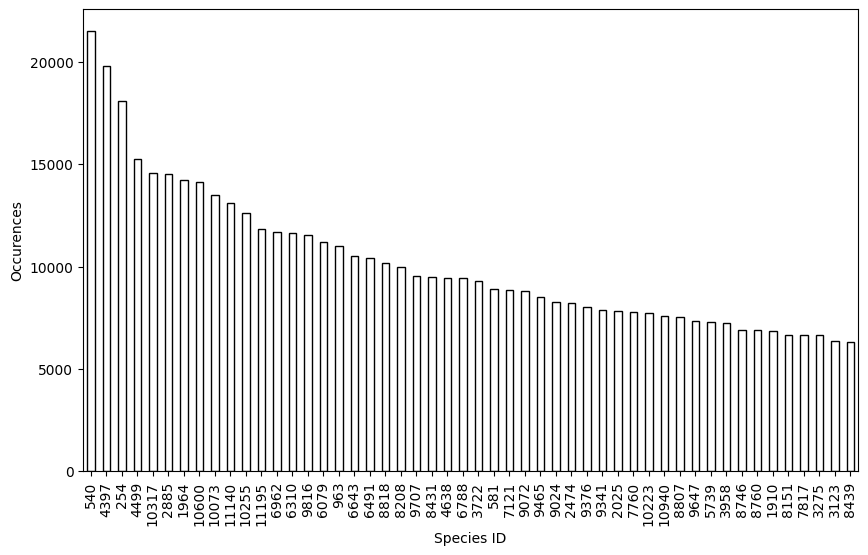

In [147]:
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', edgecolor='black', facecolor='none')
plt.ylabel('Occurences')
plt.xlabel('Species ID')
plt.xticks(rotation=90)
plt.show()

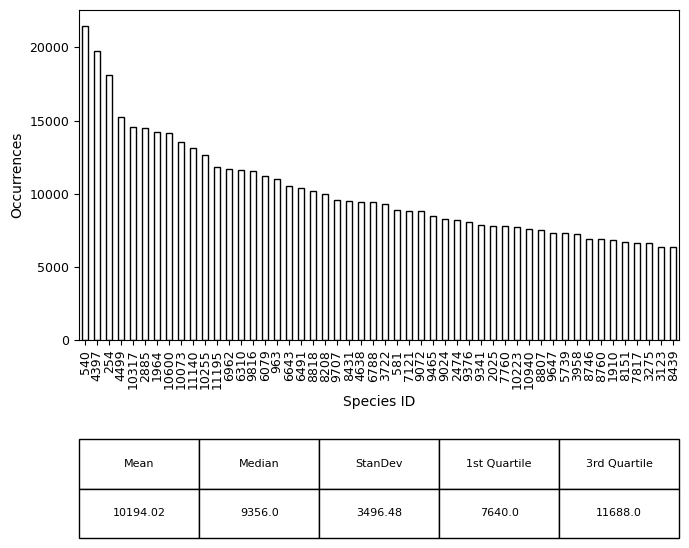

In [169]:
# Calculate mean, median, standard deviation, and quartiles
summary_stats = species_counts.agg(['mean', 'median', 'std', 'quantile']).round(2)
summary_stats['1st Quartile'] = species_counts.quantile(0.25).round(2)
summary_stats['3rd Quartile'] = species_counts.quantile(0.75).round(2)
summary_stats = summary_stats.drop(index='quantile').to_frame().T
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'std': 'StanDev'})

# Plotting the bar plot
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', edgecolor='black', facecolor='none', fontsize=9)
plt.ylabel('Occurrences')
plt.xlabel('Species ID')
plt.xticks(rotation=90)

# Add a table below the bar plot with mean, median, std, and quartiles
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.35)
ax_table = plt.gca().table(cellText=summary_stats.values,
                           colLabels=summary_stats.columns,
                           cellLoc='center',
                           loc='bottom',
                           bbox=[0, -0.6, 1, 0.3])
ax_table.auto_set_font_size(False)
ax_table.set_fontsize(8)
ax_table.scale(1.2, 1.2)

plt.show()


In [171]:
species_counts.describe()

count       50.000000
mean     10194.020000
std       3496.478593
min       6347.000000
25%       7640.000000
50%       9356.000000
75%      11688.000000
max      21489.000000
Name: count, dtype: float64